# Predicting heart disease using machine learning 

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease or not based on their medical attributes.

We're going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation
7. Predicting new patient

## 1. Problem Definition

In a statement, 
> Given clinical parameters about a patient, can we predict whether a patient has heart disease or not?

## 2. Data

The original data came from the Cleavland data from the UCI Machine Learning Repository, there is also a version of the data available on kaggle: https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data

## 3. Evaluation

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, wel'll pursue the project

## 4. Features

This is where you'll get different information about each of the features in the data.

Features Descriptions:
1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
   * 0: Typical angina: chest pain related decrease blood supply to the heart
   * 1: Atypical angina: chest pain not related to heart
   * 2: Non-anginal pain: typically esophageal spasms (non heart related)
   * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
6. serum = LDL + HDL + .2 * triglycerides
above 200 is cause for concern
7. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
'>126' mg/dL signals diabetes
8. restecg - resting electrocardiographic results
   * 0: Nothing to note
   * 1: ST-T Wave abnormality can range from mild symptoms to severe problems signals non-normal heart beat
   * 2: Possible or definite left ventricular hypertrophy Enlarged heart's main pumping chamber
9. thalach - maximum heart rate achieved exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
 * 0: Upsloping: better heart rate with excercise (uncommon)
 * 1: Flatsloping: minimal change (typical healthy heart)
 * 2: Downslopins: signs of unhealthy heart ca - number of major vessels (0-3) colored by flourosopy colored vessel means the doctor can see the blood passing through the more blood movement the better (no clots)
   
12. thal - thalium stress result
 * 1,3: normal
 * 6: fixed defect: used to be defect but ok now
 * 7: reversable defect: no proper blood movement when excercising
   
13. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

In [247]:
features_description = {
    "id": "Unique identifier for each patient",
    "age": "Age of the patient in years",
    "origin": "Place of study",
    "sex": "Sex of the patient (male or female)",
    "cp": "Chest pain type (typical angina, atypical angina, non-anginal pain, asymptomatic)",
    "trestbps": "Resting blood pressure (mm Hg on hospital admission)",
    "chol": "Serum cholesterol level (mg/dl)",
    "fbs": "Fasting blood sugar > 120 mg/dl (True/False)",
    "restecg": "Resting electrocardiographic results (normal, ST-T abnormality, left ventricular hypertrophy)",
    "thalach": "Maximum heart rate achieved",
    "exang": "Exercise-induced angina (True/False)",
    "oldpeak": "ST depression induced by exercise relative to rest",
    "slope": "Slope of the peak exercise ST segment",
    "ca": "Number of major vessels (0–3) colored by fluoroscopy",
    "thal": "Thalassemia status (normal, fixed defect, reversible defect)",
    "num": "Target variable: presence of heart disease (0 = no disease, 1 = disease)"}

features_description

{'id': 'Unique identifier for each patient',
 'age': 'Age of the patient in years',
 'origin': 'Place of study',
 'sex': 'Sex of the patient (male or female)',
 'cp': 'Chest pain type (typical angina, atypical angina, non-anginal pain, asymptomatic)',
 'trestbps': 'Resting blood pressure (mm Hg on hospital admission)',
 'chol': 'Serum cholesterol level (mg/dl)',
 'fbs': 'Fasting blood sugar > 120 mg/dl (True/False)',
 'restecg': 'Resting electrocardiographic results (normal, ST-T abnormality, left ventricular hypertrophy)',
 'thalach': 'Maximum heart rate achieved',
 'exang': 'Exercise-induced angina (True/False)',
 'oldpeak': 'ST depression induced by exercise relative to rest',
 'slope': 'Slope of the peak exercise ST segment',
 'ca': 'Number of major vessels (0–3) colored by fluoroscopy',
 'thal': 'Thalassemia status (normal, fixed defect, reversible defect)',
 'num': 'Target variable: presence of heart disease (0 = no disease, 1 = disease)'}

## Preparing the tools

We're going to use pandas, matplotlib and Numpy for data analysis and manipulation.


In [170]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plot to appear inside the notebook
%matplotlib inline 

#Models from scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

### Load data

In [171]:
df = pd.read_csv("heart-disease.csv")
df.shape # row, columns

(303, 14)

## Data Exploration (exploratory data analysis or EDA)

The goal here is to find out more about the data and become a subject matter expert on the data you're working with.

1. WHat question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [172]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [173]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [174]:
# Let's find out how many of each class there are
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

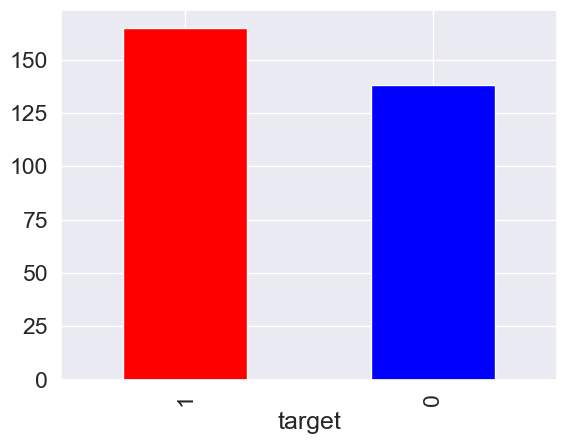

In [175]:
df["target"].value_counts().plot(kind="bar", color=["red","blue"]);

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [177]:
# Check missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [178]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to Sex

In [179]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [180]:
# Compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


In [181]:
# Correlation matrix (Pearson by default)
corr_matrix = df.corr()

corr_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


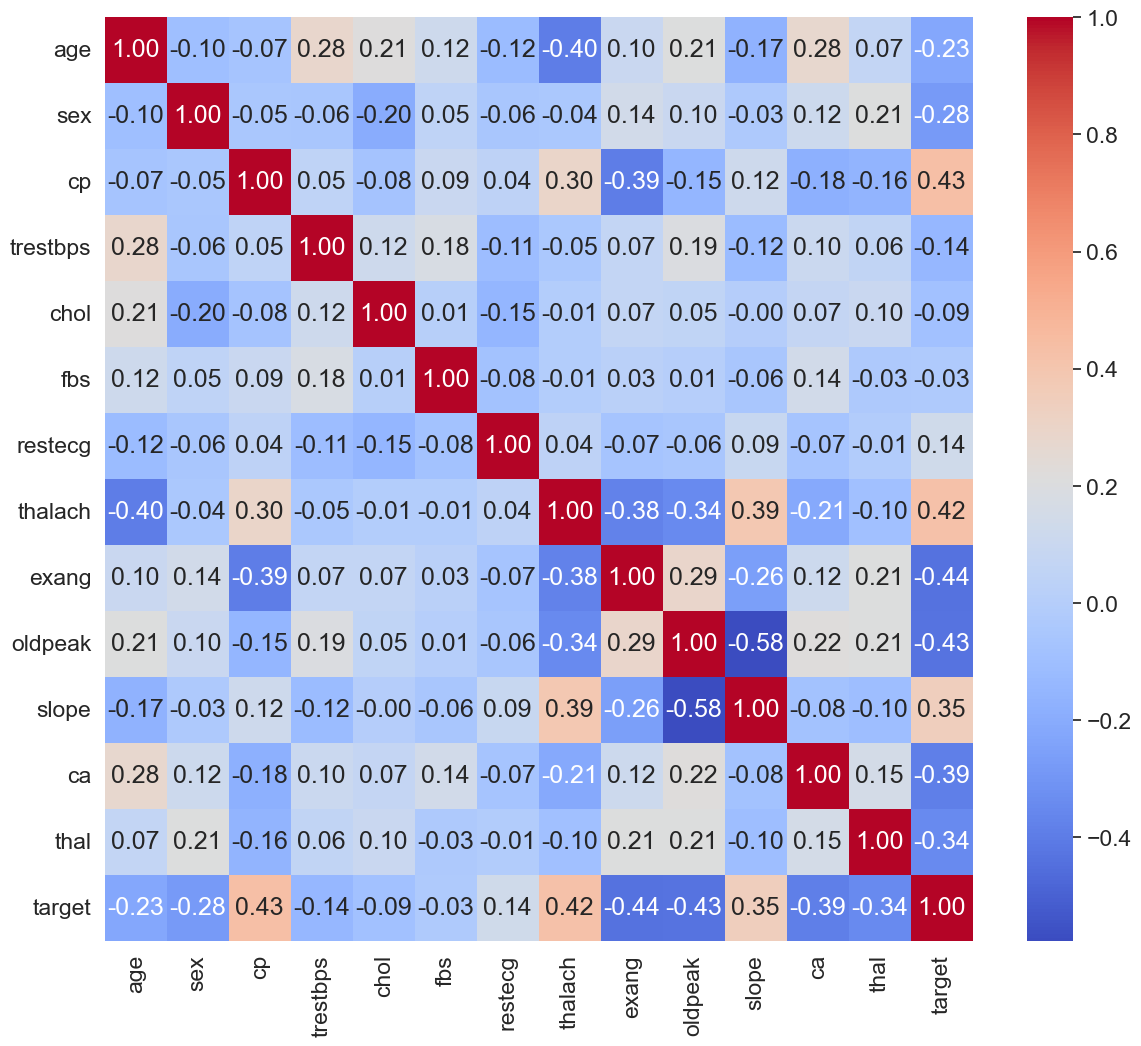

In [230]:
# Visualize the correlation matrix
def corr_matr():
    plt.figure(figsize=(14, 12))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.show()
    
corr_matr()

#### The correlation matrix shows us that having heart disease is positively correlated with cp, thalach, and slope features, however it is notable that cp and slope are categorical features

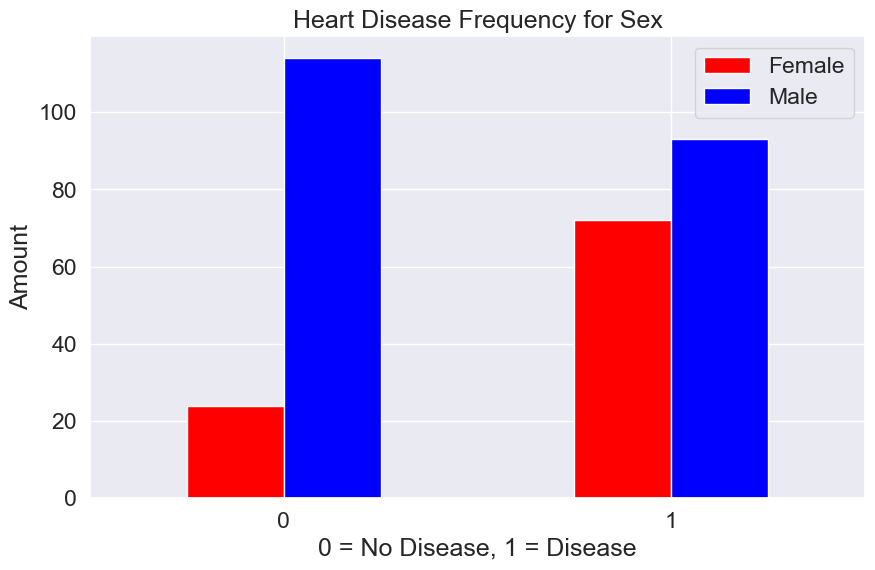

In [183]:
# Create a plot of crosstab for sex
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                    figsize=(10,6),
                                    color=["red", "blue"]);

plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"]);
plt.xticks(rotation=0);

### Age vs Max Heart Rate for Heart DIsease

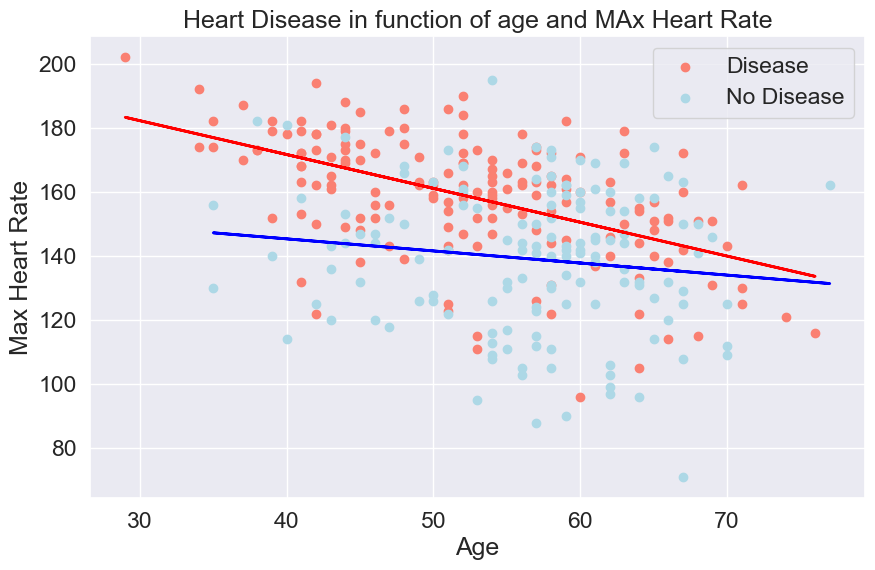

In [184]:
plt.figure(figsize=(10,6))

# Scatter with positive examples
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           c="salmon")

# Scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="lightblue");

# Separate linear fits
x1 = df.age[df.target==1]
y1 = df.thalach[df.target==1]
m1, b1 = np.polyfit(x1, y1, 1)
plt.plot(x1, m1*x1 + b1, color='red', linewidth=2)  # Line for target==1

x0 = df.age[df.target==0]
y0 = df.thalach[df.target==0]
m0, b0 = np.polyfit(x0, y0, 1)
plt.plot(x0, m0*x0 + b0, color='blue', linewidth=2)  # Line for target==0

# Add some helpful info
plt.title("Heart Disease in function of age and MAx Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

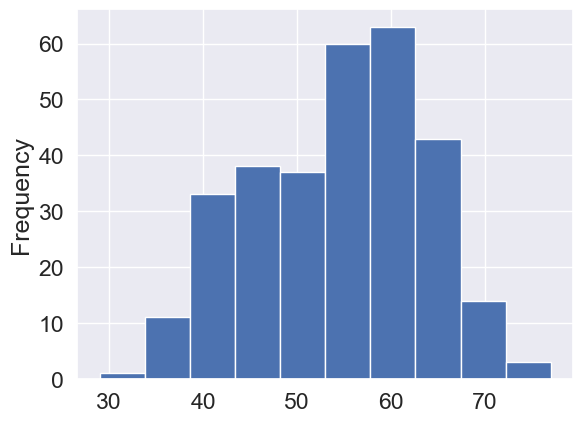

In [185]:
# Check the distribution of the age with a histogram
df.age.plot.hist();

#### This looks like a normal distribution

## Heart Disease Frequency per Chest Pain Type

cp = chest pain type

Angina is chest pain or discomfort from reduced blood flow to the heart, often feeling like pressure or squeezing, and can spread to arms, neck, jaw, or back, signaling coronary artery disease (CAD).
- 0: typical angina
- 1: atypical angina
- 2: non-anginal (No heart related)
- 3: asymptomatic

In [186]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


#### What about number 2? non Anginal? more people in the datasets suffer from pain which is not heart related

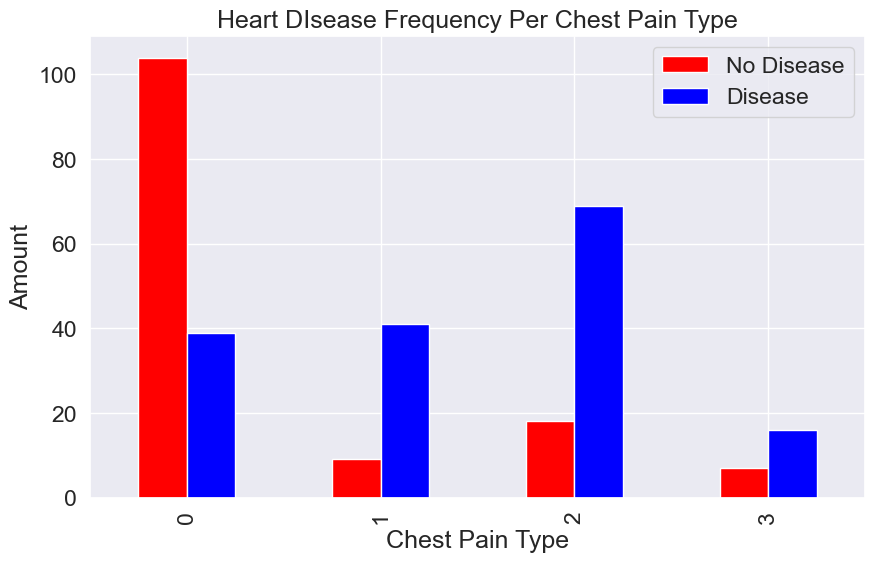

In [187]:
# Make the crosstab more visual
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                  figsize=(10,6),
                                  color=["red", "blue"])

# Add some communication
plt.title("Heart DIsease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"]);

##### We can see here that the majority of patients with heart disease had no heart related chest pain. However, it was also the largest sample so that might lead us to the wrong consideration. In fact, when we calculate the proportion of heart disease with not disease per chest pain type we have a larger number for atypical angina (1/4.55) compared to no-angina (1/3.83) and, asymptomatic (1/2.28). Showing us that patients suffering from atypical angina are at higher risk.

### Now let's try to see if we can predict whether a patient has heart disease given the parameters in the data

## 5. Modelling

In [188]:
# Split the data into the predictive features and the target
X = df.drop("target", axis=1)
y = df["target"]

In [189]:
# Split data into train and test
np.random.seed(42)

# Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Now we've got our data split into training and test sets. Next I am going to build a machine learning model.

I will train the model to find patterns on the training set, then I will test it using these patterns on the test set.


### For this stage I am going to find which model works best for our data. I am going to try 3 different models which are more suitable for a classification problem:
1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

#### Logistic Regression

Logistic Regression is a linear classification model that estimates the probability of a binary outcome (e.g., disease vs no disease) using a logistic (sigmoid) function. It models the relationship between input features and the log-odds of the target class, making it simple, interpretable, and effective when the classes are approximately linearly separable.

#### K-Nearest Neighbours (KNN) Classifier

K-Nearest Neighbours is a non-parametric, instance-based learning algorithm that classifies a data point based on the majority class of its k nearest neighbours, where k is a user-defined parameter specifying how many nearby data points are considered when making a prediction. The neighbours are identified using a distance metric (commonly Euclidean distance). The model makes no assumptions about the underlying data distribution, but its performance depends strongly on the choice of k and feature scaling.
#### Random Forest Classifier

Random Forest is an ensemble learning method that builds multiple decision trees using random subsets of the data and features, and combines their predictions through majority voting. This approach improves classification accuracy and robustness by reducing overfitting and capturing complex, non-linear relationships in the data.

In [190]:
models = {"Logistic Regression": LogisticRegression(),
          "KNN" : KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of diferent Scikit_learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        #Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [191]:
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)
model_scores

C:\Users\mrbor\OneDrive\Desktop\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

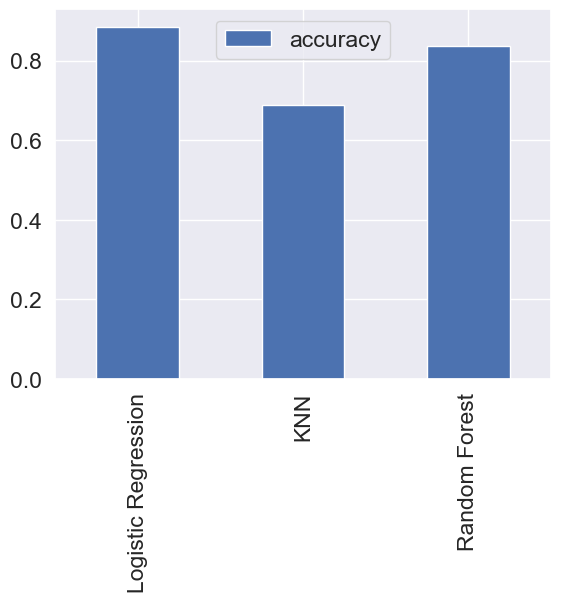

In [192]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

#### Logistic Regresion is therefore the model that performed best with a 88% accuracy. However, our aim is to reach 95% of accuracy. Therefore, now I am going to try to tune the hyperparameters so to reach 95% accuracy

#### Furthermore accuracy is a good starting point, however there are other parameters that have to be taken into consideration when building a classification machine learning model. These are:

##### Classification metrics
- **Precision** Indicates the proportion of positive identifications (model predicted class 1) which were correct. A model which produces no false positive has a precision of 1.0.
- **Recall** Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.
- **F1 score** A combination of precision and recall. A perfect model achives an F1 score 1.0.
Support The number of sample each metric was calculated on.
- **Accuracy** The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0.
- **Macro avg** Short for macro average, the average precision, recall and F1 score between classes. Macro avg doesn't class imbalance into account, so if you do have class imbalaqnces, pay attention to this metric,
- **Weighted avg** Short for weighted average, the weigheted average precision, recall, and F1 score between classes. Weighted means each metric is calculated with respcted to how many samples there in each class. This metric will favour the majority clas (e.g. will give a high value when one class out performs another due to having more samples).



#### For example in our case Recall is critical as false negatives may lead to missing patients which have heart disease but become undiagnose by the model. In this case F1 score becomes equally important, giving a balance between false positive and false negatives.

Let's start with hypterparameter tuning with different models to check whether we can reach improve the models 

In [193]:
# Tuning KNN

train_scores = []
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1,21)

# Setup KNN instance 
knn = KNeighborsClassifier()

#Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)

    # Fit the algorithm
    knn.fit(X_train, y_train)

    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train))

    # Update the test scores list
    test_scores.append(knn.score(X_test, y_test))

In [194]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [195]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41%


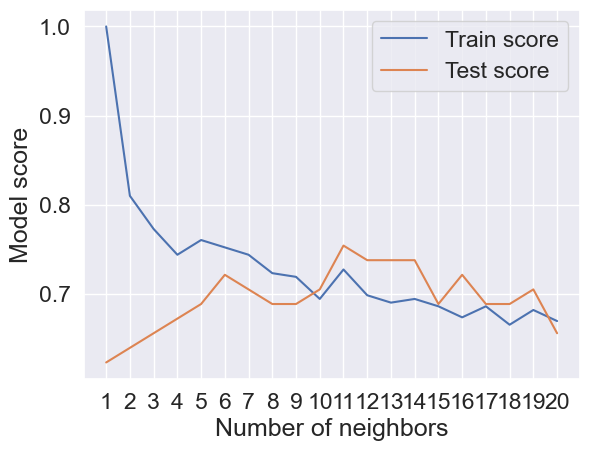

In [196]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

KNN neighbors went from 68% to 75%, still well below to logistic regression 

## Hyperparameter tuning with RandomizedSearchCV

I am going to tune:
* LogisticRegression()
* RandomForestClassifier()
  
using RandomizedSearchCV

In [197]:
# Create a hyperparameter grid for Logistic regression
log_reg_grid = {"C": np.logspace(-4,4,20),
               "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestCLasifier
rf_grid = {"n_estimators": np.arange(10,1000,50),
           "max_depth": [None, 3,5,10],
           "min_samples_split": np.arange(2,20,2),
           "min_samples_leaf": np.arange(1,20,2)}

Now we've got hyperparameter grids for each of our models, now I am going to tune them using RandomizedSearchCV

In [198]:
# LogisticRegression

np.random.seed(42)

# Setup random hyperparamter search for logistic regressiob
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparametet search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


,estimator,LogisticRegression()
,param_distributions,"{'C': array([1.0000...00000000e+04]), 'solver': ['liblinear']}"
,n_iter,20
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [199]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': np.float64(0.23357214690901212)}

In [200]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

##### Logistic regression hypertuning through cross-validation did not improve the model accuracy, we still have 88%. Let's try now with RandomForest

In [201]:
np.random.seed(42)
# Setup random hyperparameter search for RandomForestClasifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions= rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model for RandomForest
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


,estimator,RandomForestClassifier()
,param_distributions,"{'max_depth': [None, 3, ...], 'min_samples_leaf': array([ 1, 3..., 15, 17, 19]), 'min_samples_split': array([ 2, 4..., 14, 16, 18]), 'n_estimators': array([ 10, ...60, 910, 960])}"
,n_iter,20
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [202]:
# Find the best hyperparameters
rs_rf.best_params_

{'n_estimators': np.int64(210),
 'min_samples_split': np.int64(4),
 'min_samples_leaf': np.int64(19),
 'max_depth': 3}

In [203]:
# Evaluate the randomized search Random forest model
rs_rf.score(X_test, y_test)

0.8688524590163934

##### Random Forest model had an improvement from 83% to 86%, however still not good as logistic regression, so I am going to pick Logistic regression and using GridSearchCV i am going to check whether I can still improve the accuracy of the model

### Hyperparameter tuning with GreadSarchCV

In [204]:
log_reg_grid = {"C": np.logspace (-4,4,30),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LOgisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search modek
gs_log_reg.fit(X_train,y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [205]:
# Check the best hyperparameters
gs_log_reg.best_params_

{'C': np.float64(0.20433597178569418), 'solver': 'liblinear'}

In [206]:
# Evaluate the grid search LOgisticRegression model
gs_log_reg.score(X_test, y_test)

0.8852459016393442

No improvement

#### Evaluating our tuned machine learning classifier, beyond accuracy

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1_score

In [207]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)

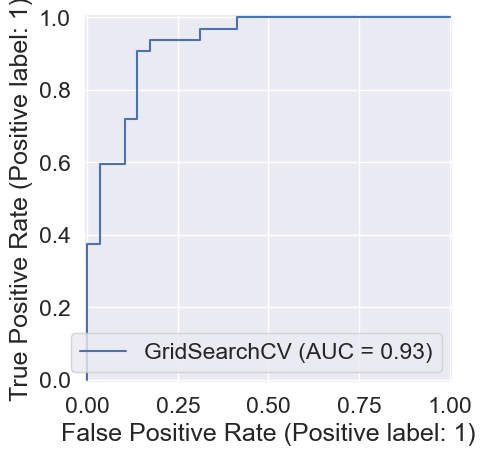

In [208]:
# Plot ROC curve and calculate and AUC metric
RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test)
plt.show()

In [209]:
# Confusion matrix 
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


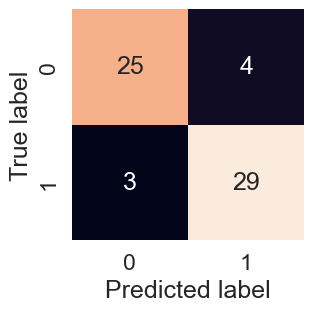

In [210]:

def plot_conf_mat(y_test, y_preds):
    """
    Plot a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    
    sns.heatmap(confusion_matrix(y_test, y_preds),
                annot=True,
                cbar=False,
                ax=ax)
    
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    plt.show()

                                   
plot_conf_mat(y_test, y_preds)

#### From this confusion matrix we can see that we have only 3 False negative and 4 False positive which is a good sign

Now we've got a ROC curve, an AUC metric and a confusion matrix, let's get the classification report and cross-validates precision, recall, and F1 score

In [211]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



**Recall** = 0.91 for class 1 (disease)
This means 91% of patients with heart disease were correctly identified

**Precision** = 0.88
When the model predicts heart disease, it is correct 88% of the time

**F1** = 0.89 for class 1
Indicates a strong trade-off between recall and precision

The model demonstrates strong and well-balanced performance, achieving high recall for heart disease cases (0.91), which is critical in a medical classification context. The high F1-score (0.89) indicates an effective trade-off between identifying diseased patients and limiting false positives. Overall, the results suggest that the model is reliable and suitable for heart disease prediction.

### Calculate evauation metrics using cross-validation
Now I am going to calculate precision, recall and f1-score of the model using cross-validation using cross_val_score()

In [212]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': np.float64(0.20433597178569418), 'solver': 'liblinear'}

In [213]:
# CReate a new clasifier with best paramters
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

In [214]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="accuracy")
cv_acc = np.mean(cv_acc)
cv_acc

np.float64(0.8446994535519124)

In [215]:
# Cross-validated precision
cv_precision = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="precision")
cv_precision = np.mean(cv_precision)
cv_precision

np.float64(0.8207936507936507)

In [216]:
# Cross-validated recall
cv_recall = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

np.float64(0.9212121212121213)

In [217]:
# Cross-validated f1-score
cv_f1 = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

np.float64(0.8673007976269721)

In [218]:
# Visualise cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy" : cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                         index=[0])
cv_metrics

,Accuracy,Precision,Recall,F1
0,0.844699,0.820794,0.921212,0.867301


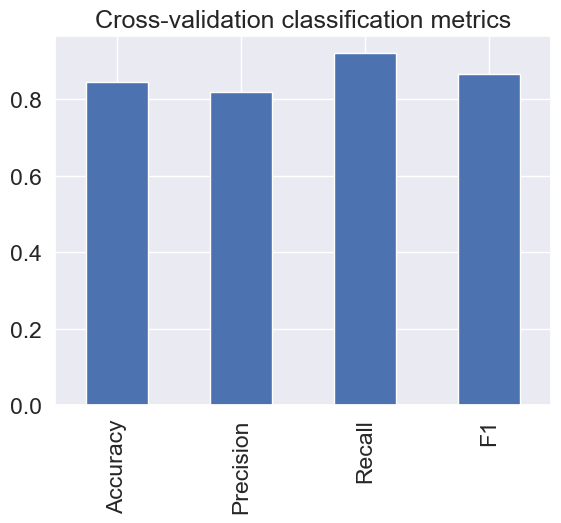

In [219]:
# Cv metrics bar plot
cv_metrics.T.plot.bar(title="Cross-validation classification metrics",
                      legend=False);

### Feature importance

Feature importance is another  as asking, "which features contributed most to the outcomes of the model and how did they contribute?"

This is different for each machine learning model, now I am going to find feature importance for the Logistic Regression model

In [220]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [221]:
# Fit an instance of Logistic Regression
gs_log_reg.best_params_

clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

clf.fit(X_train, y_train);

In [222]:
# Check coef_
# this gives how much each parameter in the training set contributes for the target
clf.coef_

array([[ 0.00316728, -0.86044619,  0.6606706 , -0.01156993, -0.00166374,
         0.04386123,  0.31275813,  0.02459361, -0.60413061, -0.56862832,
         0.45051624, -0.63609879, -0.67663383]])

In [224]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': np.float64(0.0031672769574500135),
 'sex': np.float64(-0.8604461876509621),
 'cp': np.float64(0.6606705956911073),
 'trestbps': np.float64(-0.011569931563712749),
 'chol': np.float64(-0.0016637424209784567),
 'fbs': np.float64(0.04386123481544026),
 'restecg': np.float64(0.3127581278171948),
 'thalach': np.float64(0.02459361107844528),
 'exang': np.float64(-0.6041306062020464),
 'oldpeak': np.float64(-0.5686283181245352),
 'slope': np.float64(0.4505162370054866),
 'ca': np.float64(-0.6360987949056705),
 'thal': np.float64(-0.6766338344951353)}

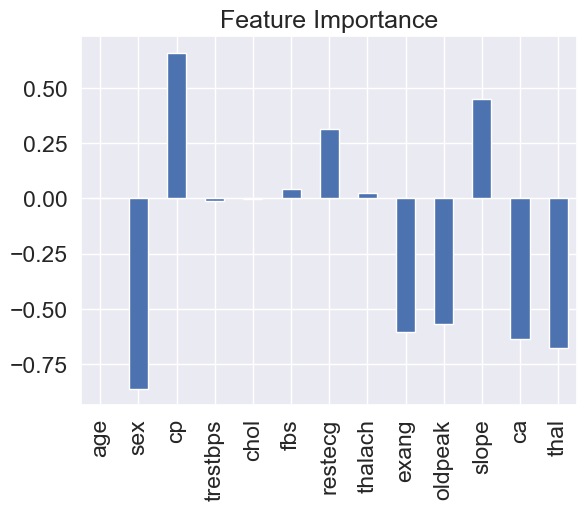

In [226]:
# Visualise feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

In [237]:
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93


In [239]:
pd.crosstab(df["restecg"], df["target"])

target,0,1
restecg,,
0,79,68
1,56,96
2,3,1


In [248]:
features_description

{'id': 'Unique identifier for each patient',
 'age': 'Age of the patient in years',
 'origin': 'Place of study',
 'sex': 'Sex of the patient (male or female)',
 'cp': 'Chest pain type (typical angina, atypical angina, non-anginal pain, asymptomatic)',
 'trestbps': 'Resting blood pressure (mm Hg on hospital admission)',
 'chol': 'Serum cholesterol level (mg/dl)',
 'fbs': 'Fasting blood sugar > 120 mg/dl (True/False)',
 'restecg': 'Resting electrocardiographic results (normal, ST-T abnormality, left ventricular hypertrophy)',
 'thalach': 'Maximum heart rate achieved',
 'exang': 'Exercise-induced angina (True/False)',
 'oldpeak': 'ST depression induced by exercise relative to rest',
 'slope': 'Slope of the peak exercise ST segment',
 'ca': 'Number of major vessels (0–3) colored by fluoroscopy',
 'thal': 'Thalassemia status (normal, fixed defect, reversible defect)',
 'num': 'Target variable: presence of heart disease (0 = no disease, 1 = disease)'}

In [249]:
pd.crosstab(df["slope"], df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


## 6 & 7. Predicting heart disease in new patients

I have not hit the 95% accuracy threshold, reaching a 88%. Other things can be done to improve the model such as collecting the data or trying a differnt model, however, 88% is good enough to trying predict new patients

In [250]:
# Let's create the data for a new patient with different parameters
new_patient = [[
    63,   # age
    1,    # sex
    3,    # cp
    145,  # trestbps
    233,  # chol
    1,    # fbs
    0,    # restecg
    150,  # thalach
    0,    # exang
    2.3,  # oldpeak
    0,    # slope
    0,    # ca
    1     # thal
]]


In [264]:
# Prediction whether the new patient has or has not heart disease
def predict(new_patient):
    prediction = clf.predict(new_patient)
    print("Prediction:", prediction[0])


# Probability of the patient having heart disease
def probability(new_patient):
    proba = clf.predict_proba(new_patient)
    risk = proba[0][1]

    print("Probability of heart disease:", risk)

    if risk >= 0.5:
        print(f"High risk of heart disease ({risk:.2%})")
    else:
        print(f"Low risk of heart disease ({risk:.2%})")

predict(new_patient)
probability(new_patient)

Prediction: 1
Probability of heart disease: 0.7417313372472486
High risk of heart disease (74.17%)


C:\Users\mrbor\OneDrive\Desktop\heart-disease-project\env\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\mrbor\OneDrive\Desktop\heart-disease-project\env\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


#### So here the model successfully identified a heart disease of the new patient with a probability of 74%

In [268]:

### 5️⃣ Push your notebook to GitHub



git init
git add .
git commit -m "Initial commit: heart disease classification project"
git branch -M main
git remote add origin https://github.com/yourusername/heart-disease-classification-ml.git
git push -u origin main


SyntaxError: invalid syntax (2653732138.py, line 5)